In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [35]:
## Importing tensor incidence matrix
## Skipping much of the preprocessing as we have a very simplified matrix
rppa_sheets = pd.read_csv('HOCMO_test.csv')
rppa_averaged = rppa_sheets.set_index('CRs')

## Dimensions of the tensor, concerning that these appear to be hard coded
x = rppa_averaged.shape[0]
y = 5 
z = 5 

##turn to binary
rppa_averaged_binary = rppa_averaged.copy(deep=True)
rppa_averaged_binary[rppa_averaged_binary < 0] = -1
rppa_averaged_binary[rppa_averaged_binary >= 0] = 1

#make positive with abs
rppa_averaged = np.absolute(rppa_averaged) 
protein_names = rppa_averaged.index
tensor = rppa_averaged.to_numpy().reshape([x, y, z]).transpose([2, 0, 1]) ## why is it transposed like this? no reason given here
disease_names = pd.Index([v.split('_')[0] for v in rppa_averaged.columns.to_numpy().reshape([y,z]).transpose([1,0])[0]]) ## just some fancy matrix manipulation to get disease names
print('Size of the RPPA tensor:',tensor.shape)
print(disease_names)
rppa_averaged


Size of the RPPA tensor: (5, 5, 5)
Index(['D1', 'D2', 'D3', 'D4', 'D5'], dtype='object')


,D1_G1,D1_G2,D1_G3,D1_G4,D1_G5,D2_G1,D2_G2,D2_G3,D2_G4,D2_G5,...,D4_G1,D4_G2,D4_G3,D4_G4,D4_G5,D5_G1,D5_G2,D5_G3,D5_G4,D5_G5
CRs,,,,,,,,,,,,,,,,,,,,,
CR1,0.889497,0.244310,0.976492,0.931965,0.945391,0.247286,0.108429,0.185284,0.939510,0.378628,...,0.956744,0.444234,0.727902,0.312527,0.338794,0.866525,0.400832,0.073119,0.900419,0.511059
CR2,0.416968,0.089035,0.709536,0.377873,0.363965,0.475940,0.860456,0.979859,0.611525,0.001521,...,0.491717,0.840703,0.315538,0.927028,0.388505,0.612635,0.798377,0.588671,0.429804,0.905163
CR3,0.842536,0.741153,0.152742,0.998339,0.804399,0.996603,0.629607,0.048680,0.218329,0.254002,...,0.507155,0.259856,0.754986,0.941100,0.927891,0.795058,0.522722,0.227854,0.638277,0.318546
CR4,0.990511,0.091797,0.303399,0.094740,0.300180,0.088597,0.358364,0.576739,0.872218,0.063015,...,0.811505,0.999966,0.483076,0.176349,0.625530,0.959229,0.633204,0.022281,0.114326,0.815993
CR5,0.314774,0.653761,0.647430,0.521343,0.243035,0.491688,0.042678,0.854353,0.517622,0.758473,...,0.164369,0.531591,0.898576,0.067652,0.882239,0.604085,0.257794,0.595801,0.246294,0.517426


tensor size: (5, 5, 5)


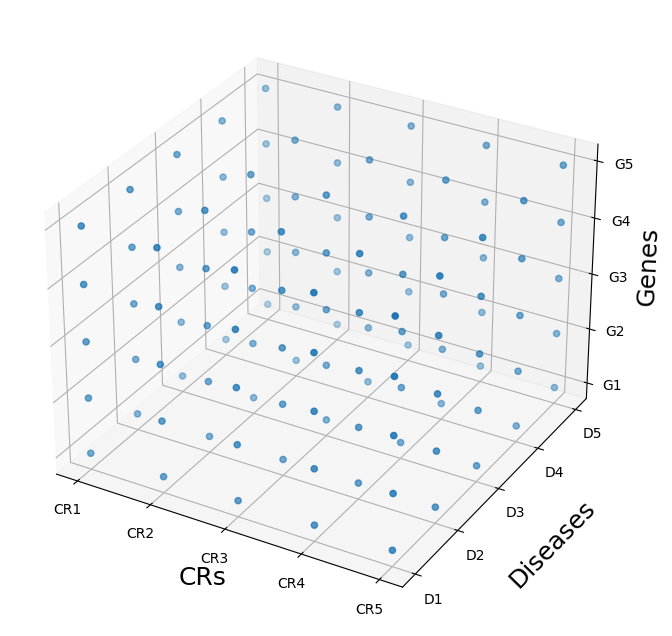

In [5]:
tensor_T = np.transpose(tensor,[1,2,0])
print('tensor size:',tensor_T.shape)
x,y,z = tensor_T.nonzero()
fig = plt.figure(figsize=(9,8))
fig.clf()
ax = fig.add_subplot(111, projection='3d')
ax.set_xticks([])
# ax.set_yticks([0,1,2,3,4,5])
# ax.set_zticks([0,1,2,3,4])
ax.set(xticks=range(tensor_T.shape[0]), xticklabels=protein_names,
    yticks=range(tensor_T.shape[1]), yticklabels=disease_names,
#        xticks=range(tensor_T.shape[0]), xticklabels=protein_names)
       zticks=range(tensor_T.shape[2]), zticklabels=['G1','G2','G3','G4','G5']) 
ax.set_xlabel('CRs', fontsize=18)
ax.set_ylabel('Diseases', fontsize=18)
ax.yaxis.labelpad=15
ax.set_zlabel('Genes', fontsize=18)
c = (z<=0)
ax.scatter(x, y, z, cmap='cm.coolwarm')

In [14]:
from hocmo import hocmo

In [15]:
incidence_matrix,incidence_matrix_binary,protein_names,disease_names,gene_names,tensor = hocmo.createTensor('HOCMO_test.csv','CRs',5,5)

Size of the tensor: (5, 5, 5)
Index(['D1', 'D2', 'D3', 'D4', 'D5'], dtype='object')


tensor size: (5, 5, 5)


/usr/local/lib/python3.10/site-packages/hocmo/hocmo.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, z, cmap='cm.coolwarm')


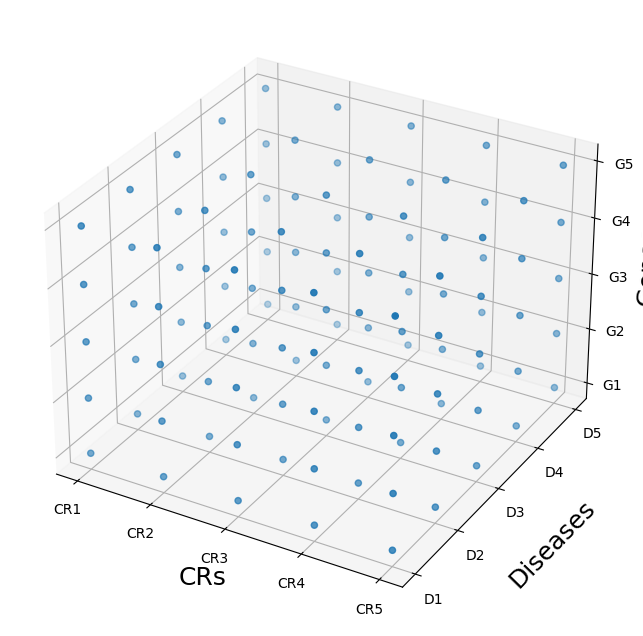

In [16]:
hocmo.basicVisual(tensor, protein_names, disease_names,gene_names)